# Week 38 - Exercises

Bias means the model's systematic deviation from the actual value. So a big bias means that there is a big deviation between the model and the ideal. We therefore want a small bias.

Variance is a statistical measurement of how spread out numbers are. A high variance means a big spread around the mean. We therefore want a low variance.

I used a lot of the codes from the Lecture Notes: https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff to write my codes under.

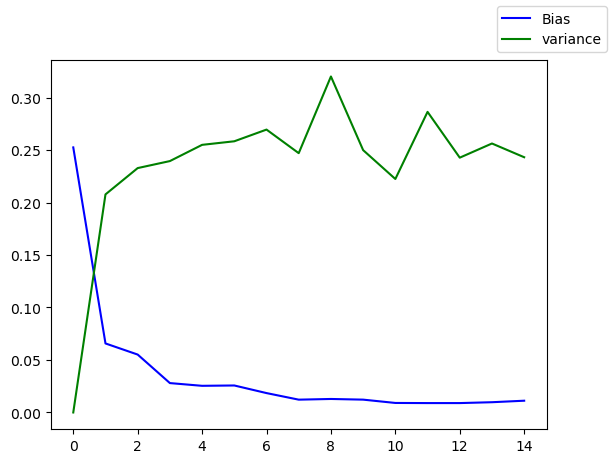

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


np.random.seed(2018)

n = 500
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

degree = 15

bias_list = []
var_list = []


for deg in range(degree):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

    model = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression(fit_intercept=False))

    y_pred = model.fit(x_train,y_train).predict(x_test) 

    bias = np.mean( (y_test - y_pred)**2)
    variance = np.var(y_pred)

    bias_list.append(bias)
    var_list.append(variance)

fig, ax = plt.subplots()


ax.plot(bias_list, "b-", label="Bias")
ax.plot(var_list, "g-", label="variance")

fig.legend()

plt.show()

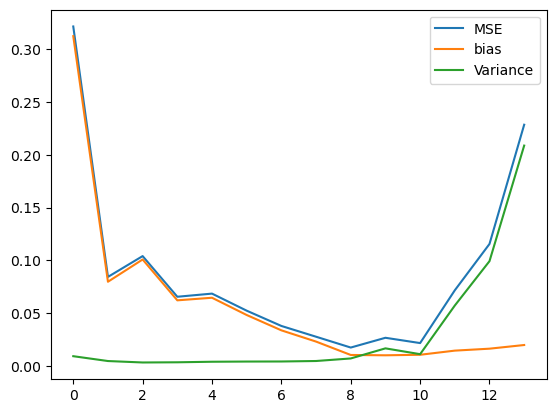

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
#y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
noise = np.random.normal(0, 0.1, x.shape)
f = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)
y = f + noise

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
degrees = np.zeros(maxdegree)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_predict = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_predict[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    degrees[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_predict)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_predict, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_predict, axis=1, keepdims=True) )

plt.plot(degrees, error, label='MSE')
plt.plot(degrees, bias, label='bias')
plt.plot(degrees, variance, label='Variance')
plt.legend()
plt.show()